[*********************100%***********************]  2 of 2 completed

⬇️ Downloading historical data...
✅ Downloaded 1819 rows of data from 2018-01-01 to 2025-05-17 for HDFCBANK.NS and ICICIBANK.NS.


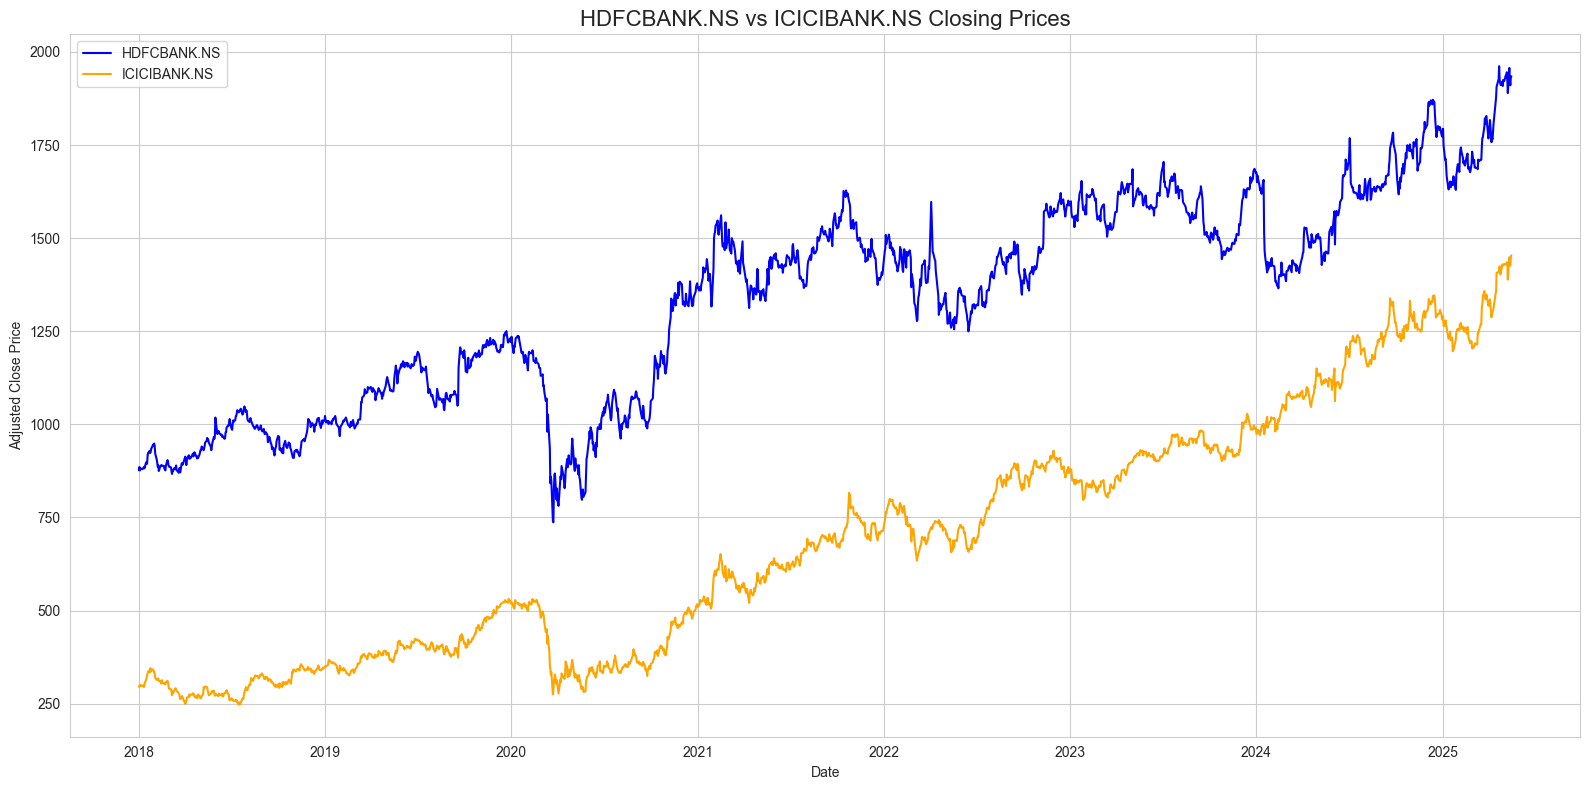

📊 Above: Visual comparison of the two stocks' price movements over time.

📈 Correlation (HDFCBANK.NS vs ICICIBANK.NS): 0.9209
✅ Good correlation. The stocks move together, which is a good sign for pairs trading.

🔗 Cointegration test p-value: 0.0289
✅ Pair is cointegrated. This means their price relationship is stable over time, ideal for mean-reversion strategies.

Stationarity checks:
🧪 ADF p-value for HDFCBANK.NS: 0.7123
❌ HDFCBANK.NS is likely non-stationary. Mean-reversion signals may be unreliable.
🧪 ADF p-value for ICICIBANK.NS: 0.9891
❌ ICICIBANK.NS is likely non-stationary. Mean-reversion signals may be unreliable.

🧮 Calculated spread (HDFCBANK.NS - ICICIBANK.NS). This is the difference in price between the two stocks at each point in time.
📏 Calculated rolling mean and standard deviation of the spread.
📊 Calculated z-score: how many standard deviations the current spread is from its rolling mean.
🧪 ADF p-value for Spread: 0.0796
❌ Spread is likely non-stationary. Mean-revers

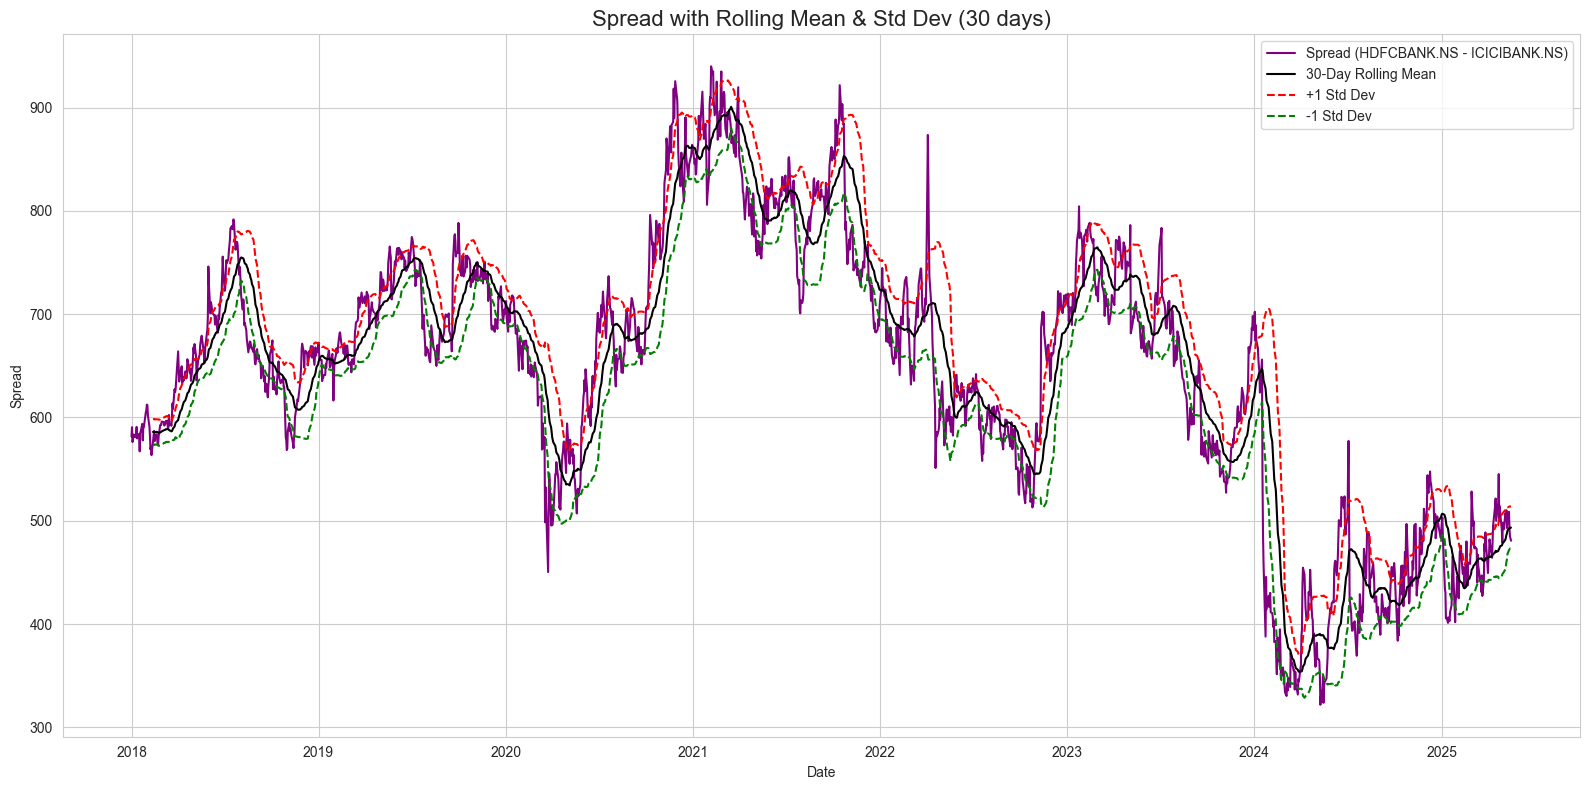

📊 Above: The spread should oscillate around its mean if the pair is suitable for mean-reversion trading.

🔔 Generating trading signals based on z-score thresholds...
✅ Signals generated: 1 = long spread (buy STOCK1, sell STOCK2), -1 = short spread (sell STOCK1, buy STOCK2), 0 = no position.


📊 Above: Interactive Z-score plot with buy/sell/close signals. When z-score is below -2, the spread is much lower than usual (potential buy). Above +2, much higher than usual (potential sell).

💸 Calculated daily returns, net of transaction costs (0.1% per trade).

📊 Performance Metrics:
• Sharpe Ratio: 0.79 (risk-adjusted return; >1 is good)
• Max Drawdown: -21.25% (largest peak-to-trough loss)
• Win Rate: 28.81% (fraction of days with positive return)


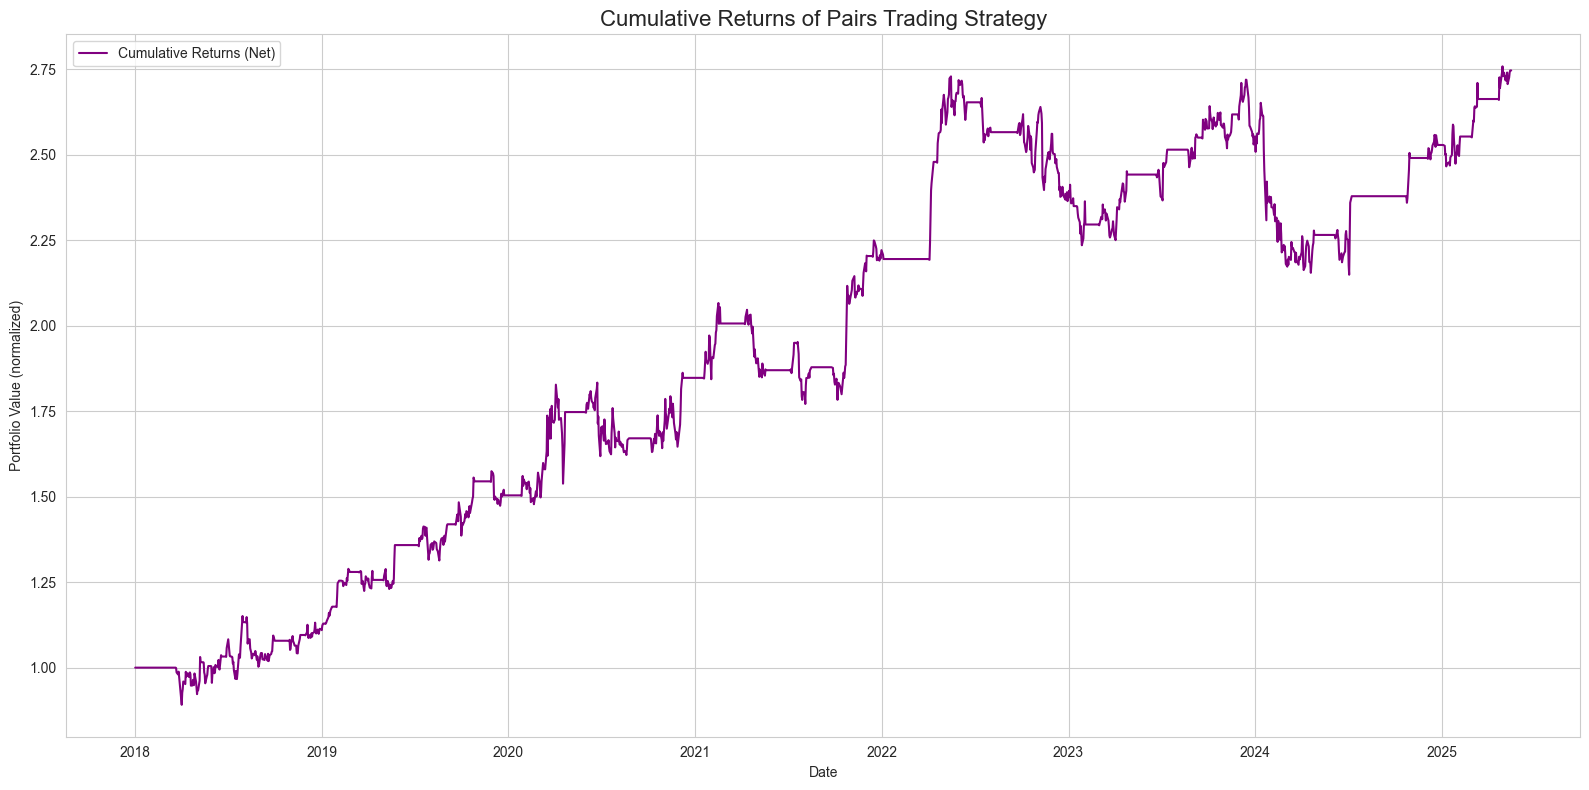

📈 Above: Cumulative returns of the strategy, including transaction costs.

📋 Summary Table:
         Metric     Value
0  Final Return  2.746525
1  Sharpe Ratio  0.790412
2  Max Drawdown -0.212528
3      Win Rate  0.288070

ℹ️ Interpretation: Final Return is the total growth of your portfolio. Sharpe Ratio measures risk-adjusted return. Max Drawdown is the worst loss from a peak. Win Rate is the % of days with profit.

✅ All steps complete. Change tickers and dates at the top to analyze any other pair!


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint, adfuller
from datetime import datetime

# ========== PARAMETERS ==========
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
tickers = ["HDFCBANK.NS", "ICICIBANK.NS"]  # Change these for any pair
window = 30  # Rolling window for z-score and mean
entry_z = 2.0
exit_z = 0.0
transaction_cost = 0.001  # 0.1% per trade

# ========== DATA DOWNLOAD & CLEANING ==========
print("⬇️ Downloading historical data...")
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]
data.columns = ["STOCK1", "STOCK2"]
data.dropna(inplace=True)
print(f"✅ Downloaded {len(data)} rows of data from {start_date} to {end_date} for {tickers[0]} and {tickers[1]}.")

# ========== PRICE COMPARISON ==========
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
plt.plot(data["STOCK1"], label=tickers[0], color="blue")
plt.plot(data["STOCK2"], label=tickers[1], color="orange")
plt.title(f"{tickers[0]} vs {tickers[1]} Closing Prices", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.tight_layout()
plt.show()
print("📊 Above: Visual comparison of the two stocks' price movements over time.")

# ========== CORRELATION ==========
correlation = data["STOCK1"].corr(data["STOCK2"])
print(f"\n📈 Correlation ({tickers[0]} vs {tickers[1]}): \033[1m{correlation:.4f}\033[0m")
if correlation < 0.6:
    print("⚠️ Correlation is weak. Consider finding another pair. High correlation is usually preferred for pairs trading.")
else:
    print("✅ Good correlation. The stocks move together, which is a good sign for pairs trading.")

# ========== COINTEGRATION ==========
score, pvalue, _ = coint(data["STOCK1"], data["STOCK2"])
print(f"\n🔗 Cointegration test p-value: \033[1m{pvalue:.4f}\033[0m")
if pvalue < 0.05:
    print("✅ Pair is cointegrated. This means their price relationship is stable over time, ideal for mean-reversion strategies.")
else:
    print("❌ Not cointegrated. The price relationship may not be stable. Proceed with caution or try another pair.")

# ========== STATIONARITY TESTS ==========
def stationarity_test(series, name="Series", cutoff=0.01):
    pvalue = adfuller(series)[1]
    print(f"🧪 ADF p-value for {name}: \033[1m{pvalue:.4f}\033[0m")
    if pvalue < cutoff:
        print(f"✅ {name} is likely stationary. This is good for mean-reversion strategies.")
    else:
        print(f"❌ {name} is likely non-stationary. Mean-reversion signals may be unreliable.")
    return pvalue

print("\nStationarity checks:")
stationarity_test(data["STOCK1"], tickers[0])
stationarity_test(data["STOCK2"], tickers[1])

# ========== SPREAD & Z-SCORE ==========
spread = data["STOCK1"] - data["STOCK2"]
print(f"\n🧮 Calculated spread ({tickers[0]} - {tickers[1]}). This is the difference in price between the two stocks at each point in time.")
rolling_mean = spread.rolling(window=window).mean()
rolling_std = spread.rolling(window=window).std()
zscore = (spread - rolling_mean) / rolling_std
print("📏 Calculated rolling mean and standard deviation of the spread.")
print("📊 Calculated z-score: how many standard deviations the current spread is from its rolling mean.")

# ========== STATIONARITY TEST FOR SPREAD ==========
stationarity_test(spread, "Spread")

# ========== PLOT SPREAD ==========
plt.figure(figsize=(16, 8))
plt.plot(spread, label=f"Spread ({tickers[0]} - {tickers[1]})", color='purple')
plt.plot(rolling_mean, label=f"{window}-Day Rolling Mean", color='black')
plt.plot(rolling_mean + rolling_std, '--', label="+1 Std Dev", color='red')
plt.plot(rolling_mean - rolling_std, '--', label="-1 Std Dev", color='green')
plt.title(f"Spread with Rolling Mean & Std Dev ({window} days)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Spread")
plt.legend()
plt.tight_layout()
plt.show()
print("📊 Above: The spread should oscillate around its mean if the pair is suitable for mean-reversion trading.")

# ========== SIGNAL GENERATION ==========
print("\n🔔 Generating trading signals based on z-score thresholds...")
entry_long = zscore < -entry_z
exit_long = zscore >= exit_z
entry_short = zscore > entry_z
exit_short = zscore <= exit_z

positions = pd.Series(index=zscore.index, data=0)
long_open = short_open = False

for date in zscore.index:
    if long_open:
        if exit_long[date]:
            long_open = False
        positions[date] = 1
    elif short_open:
        if exit_short[date]:
            short_open = False
        positions[date] = -1
    else:
        if entry_long[date]:
            long_open = True
            positions[date] = 1
        elif entry_short[date]:
            short_open = True
            positions[date] = -1

print("✅ Signals generated: 1 = long spread (buy STOCK1, sell STOCK2), -1 = short spread (sell STOCK1, buy STOCK2), 0 = no position.")

# ========== PLOT Z-SCORE (Plotly Interactive) ==========
import plotly.graph_objs as go

fig_z = go.Figure()
fig_z.add_trace(go.Scatter(x=zscore.index, y=zscore, mode='lines', name='Z-Score'))
fig_z.add_hline(y=entry_z, line=dict(color='red', width=2, dash='dash'))
fig_z.add_hline(y=-entry_z, line=dict(color='green', width=2, dash='dash'))
fig_z.add_hline(y=0, line=dict(color='black', width=1, dash='solid'))

buy_signals = zscore[zscore < -entry_z]
sell_signals = zscore[zscore > entry_z]
close_long = (positions.shift(1) == 1) & (positions == 0)
close_short = (positions.shift(1) == -1) & (positions == 0)

fig_z.add_trace(go.Scatter(x=buy_signals.index, y=buy_signals, mode='markers', marker=dict(color='blue', size=10), name='Buy Signal'))
fig_z.add_trace(go.Scatter(x=sell_signals.index, y=sell_signals, mode='markers', marker=dict(color='orange', size=10), name='Sell Signal'))
fig_z.add_trace(go.Scatter(x=zscore.index[close_long], y=zscore[close_long], mode='markers', marker=dict(color='purple', size=12, symbol='x'), name='Close Long'))
fig_z.add_trace(go.Scatter(x=zscore.index[close_short], y=zscore[close_short], mode='markers', marker=dict(color='black', size=12, symbol='x'), name='Close Short'))
fig_z.update_layout(
    title="Z-Score with Buy/Sell/Close Signals",
    xaxis_title="Date",
    yaxis_title="Z-Score",
    template="plotly_white",
    height=500,
    width=1100
)
fig_z.show()
print("📊 Above: Interactive Z-score plot with buy/sell/close signals. When z-score is below -2, the spread is much lower than usual (potential buy). Above +2, much higher than usual (potential sell).")

# ========== RETURNS & TRANSACTION COSTS ==========
returns = (data["STOCK1"].pct_change() - data["STOCK2"].pct_change()) * positions.shift(1)
trade_signals = positions.diff().abs()
transaction_costs = trade_signals * transaction_cost
returns_net = returns - transaction_costs
cumulative_returns = (1 + returns_net.fillna(0)).cumprod()

print("\n💸 Calculated daily returns, net of transaction costs (0.1% per trade).")

# ========== PERFORMANCE METRICS ==========
def sharpe_ratio(returns, risk_free=0):
    return (returns.mean() - risk_free) / returns.std() * np.sqrt(252)

def max_drawdown(cum_returns):
    roll_max = cum_returns.cummax()
    drawdown = (cum_returns - roll_max) / roll_max
    return drawdown.min()

def win_rate(returns):
    return (returns > 0).mean()

print("\n📊 Performance Metrics:")
print(f"• Sharpe Ratio:\033[1m {sharpe_ratio(returns_net):.2f}\033[0m (risk-adjusted return; >1 is good)")
print(f"• Max Drawdown:\033[1m {max_drawdown(cumulative_returns):.2%}\033[0m (largest peak-to-trough loss)")
print(f"• Win Rate:\033[1m {win_rate(returns_net):.2%}\033[0m (fraction of days with positive return)")

# ========== CUMULATIVE RETURNS PLOT ==========
plt.figure(figsize=(16, 8))
plt.plot(cumulative_returns, color='purple', label='Cumulative Returns (Net)')
plt.title("Cumulative Returns of Pairs Trading Strategy", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Portfolio Value (normalized)")
plt.legend()
plt.tight_layout()
plt.show()
print("📈 Above: Cumulative returns of the strategy, including transaction costs.")

# ========== SUMMARY TABLE ==========
summary = pd.DataFrame({
    "Metric": ["Final Return", "Sharpe Ratio", "Max Drawdown", "Win Rate"],
    "Value": [
        cumulative_returns.iloc[-1],
        sharpe_ratio(returns_net),
        max_drawdown(cumulative_returns),
        win_rate(returns_net)
    ]
})
print("\n📋 Summary Table:")
print(summary)
print("\nℹ️ Interpretation: Final Return is the total growth of your portfolio. Sharpe Ratio measures risk-adjusted return. Max Drawdown is the worst loss from a peak. Win Rate is the % of days with profit.")

# ========== END ==========
print("\n✅ All steps complete. Change tickers and dates at the top to analyze any other pair!")